In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
pd.options.display.max_rows = 6

In [3]:
import zipfile

In [4]:
zipfile.ZipFile('data/names1880-2024.zip').extractall('data/latestNames')

In [5]:
pd.read_csv('names/yob2014.txt', names=['name', 'gender', 'countNames'])

,name,gender,countNames
0,Emma,F,20936
1,Olivia,F,19807
2,Sophia,F,18609
...,...,...,...
33240,Zymiere,M,5
33241,Zyran,M,5
33242,Zyrin,M,5


In [6]:
# for each year in 1880-2018, load the corresponding CSV file names/yobXXXX.txt
# as DataFrame, create new column "year" with all elements set to loop variable,
# then concatenate all DataFrames into a single one
allyears24 = pd.concat(pd.read_csv(f'data/latestNames/yob{year}.txt',
                                 names=['name','gender','number']).assign(year=year)
                     for year in range(1880, 2025))

In [7]:
allyears24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2149477 entries, 0 to 31903
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   gender  object
 2   number  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 82.0+ MB


In [8]:
allyears24.year.min(), allyears24.year.max()

(np.int64(1880), np.int64(2024))

In [9]:
allyears24

,name,gender,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
...,...,...,...,...
31901,Zypher,M,5,2024
31902,Zyre,M,5,2024
31903,Zyrell,M,5,2024


In [10]:
# save DataFrame to compressed CSV file, dropping uninteresting index
allyears24.to_csv('data/allyears.csv.gz', index=False)

In [11]:
allyears24 = pd.read_csv('data/allyears.csv.gz')

In [12]:
allyears24

,name,gender,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
...,...,...,...,...
2149474,Zypher,M,5,2024
2149475,Zyre,M,5,2024
2149476,Zyrell,M,5,2024


In [17]:
allyears_indexed = allyears24.set_index(['gender','name','year']).sort_index()

In [18]:
allyears_indexed.loc[('F','Mary')]

,number
year,
1880,7065
1881,6919
1882,8148
...,...
2022,2116
2023,2081
2024,2196


In [19]:
ehsan = allyears_indexed.loc[('M','Ehsan')]
ehsan

,number
year,
1977,5
1979,6
1980,11
...,...
2022,18
2023,28
2024,36


In [20]:
ehsan['number'].sum()

np.int64(510)

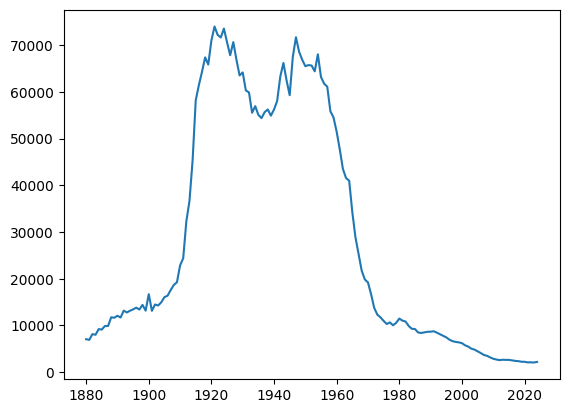

In [21]:
pp.plot(allyears_indexed.loc[('F','Mary')])

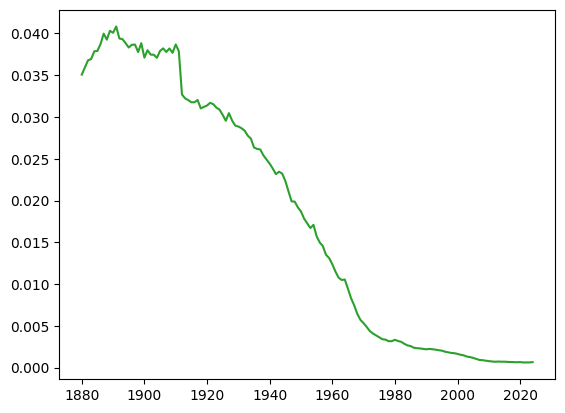

In [23]:
# normalize F/Mary time series by the total number of births each year
pp.plot(allyears_indexed.loc[('F','Mary')] / allyears24.groupby('year').sum())

In [42]:
# plot number of sex/name babies as a function of year

def plotname(sex, name):
    data = allyears_indexed.loc[(sex,name)]
    
    pp.plot(data.index, data.values, label=name)
    pp.axis(xmin=1880, xmax=2024)

In [43]:
def comparenames(sex, names):
    pp.figure(figsize=(12,2.5))

    for name in names:
        plotname(sex, name)

    pp.legend()

In [27]:

normalize_F_Mary = (allyears_indexed.loc[('F','Mary')] / allyears24.groupby('year').sum())


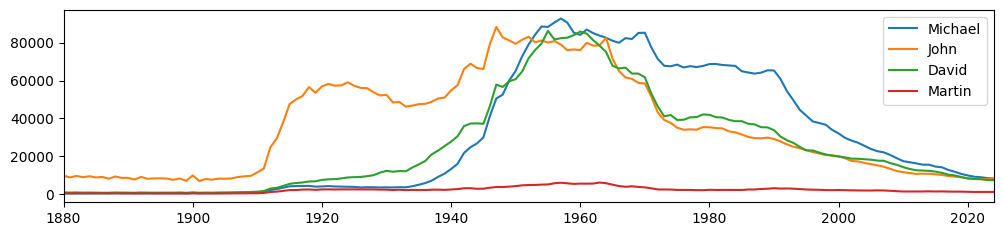

In [28]:
comparenames('M', ['Michael','John','David','Martin'])

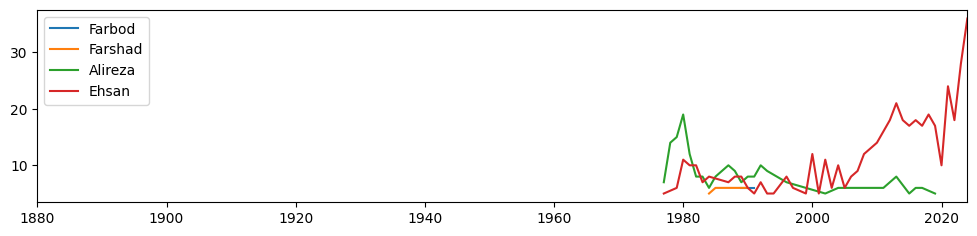

In [29]:
comparenames('M', ['Farbod','Farshad','Alireza','Ehsan'])

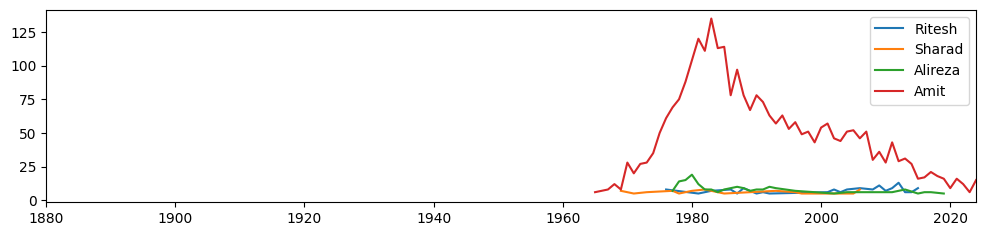

In [44]:
comparenames('M', ['Ritesh','Sharad','Alireza','Amit'])

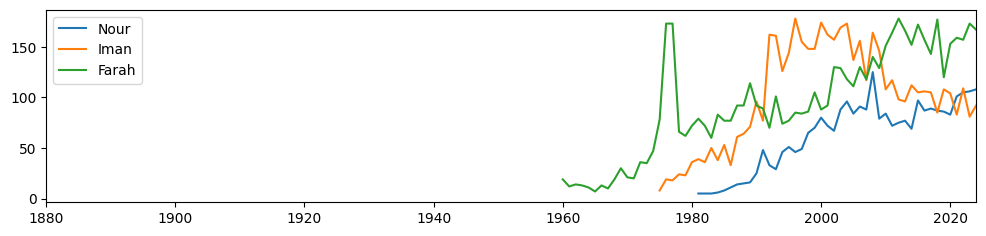

In [30]:
comparenames('F', ['Nour', 'Iman', 'Farah'])

In [31]:
normalize_F_Mary

,gender,name,number
year,,,
1880,NaN,NaN,0.035065
1881,NaN,NaN,0.035908
1882,NaN,NaN,0.036780
...,...,...,...
2022,NaN,NaN,0.000625
2023,NaN,NaN,0.000628
2024,NaN,NaN,0.000660


In [32]:
allyears_indexed.loc[('F', 'Mary')]

,number
year,
1880,7065
1881,6919
1882,8148
...,...
2022,2116
2023,2081
2024,2196


In [33]:
# find the names that has both F and M gender
def has_both_gender(name):
    return ('F', name) in allyears_indexed.index and ('M', name) in allyears_indexed.index
both_gender = [name for name in allyears_indexed.index.levels[1] if has_both_gender(name)]
both_gender



['Aaden',
 'Aadi',
 'Aadyn',
 'Aalijah',
 'Aaliyah',
 'Aaliyan',
 'Aamari',
 'Aamir',
 'Aaren',
 'Aareon',
 'Aari',
 'Aarian',
 'Aarin',
 'Aarion',
 'Aaris',
 'Aaron',
 'Aarya',
 'Aaryan',
 'Aaryn',
 'Aavyn',
 'Aayden',
 'Aba',
 'Abba',
 'Abbey',
 'Abbie',
 'Abbigail',
 'Abbott',
 'Abby',
 'Abdi',
 'Abeer',
 'Abel',
 'Abell',
 'Abey',
 'Abi',
 'Abiah',
 'Abie',
 'Abiel',
 'Abigael',
 'Abigail',
 'Abigayle',
 'Abijah',
 'Abimbola',
 'Abiola',
 'Abir',
 'Abisai',
 'Abishai',
 'Abiyah',
 'Abney',
 'Abraham',
 'Abrar',
 'Abraxas',
 'Abrian',
 'Abriel',
 'Abril',
 'Aby',
 'Abyan',
 'Acai',
 'Acari',
 'Ace',
 'Acea',
 'Acelin',
 'Acelyn',
 'Acey',
 'Acie',
 'Acire',
 'Ackley',
 'Acy',
 'Ada',
 'Adae',
 'Adaiah',
 'Adair',
 'Adali',
 'Adalid',
 'Adam',
 'Adama',
 'Adan',
 'Adar',
 'Adason',
 'Addie',
 'Addilyn',
 'Addington',
 'Addis',
 'Addisen',
 'Addison',
 'Addy',
 'Addyson',
 'Ade',
 'Adean',
 'Adebola',
 'Adedoyin',
 'Adel',
 'Adele',
 'Adeline',
 'Adell',
 'Adelyn',
 'Ademide',
 'Aden'

In [34]:
# find the names that are in both genders and their numbers grouped by year

def has_both_gender(name):
    return ('F', name) in allyears_indexed.index and ('M', name) in allyears_indexed.index
both_gender = [name for name in allyears_indexed.index.levels[1] if has_both_gender(name)]
both_gender


['Aaden',
 'Aadi',
 'Aadyn',
 'Aalijah',
 'Aaliyah',
 'Aaliyan',
 'Aamari',
 'Aamir',
 'Aaren',
 'Aareon',
 'Aari',
 'Aarian',
 'Aarin',
 'Aarion',
 'Aaris',
 'Aaron',
 'Aarya',
 'Aaryan',
 'Aaryn',
 'Aavyn',
 'Aayden',
 'Aba',
 'Abba',
 'Abbey',
 'Abbie',
 'Abbigail',
 'Abbott',
 'Abby',
 'Abdi',
 'Abeer',
 'Abel',
 'Abell',
 'Abey',
 'Abi',
 'Abiah',
 'Abie',
 'Abiel',
 'Abigael',
 'Abigail',
 'Abigayle',
 'Abijah',
 'Abimbola',
 'Abiola',
 'Abir',
 'Abisai',
 'Abishai',
 'Abiyah',
 'Abney',
 'Abraham',
 'Abrar',
 'Abraxas',
 'Abrian',
 'Abriel',
 'Abril',
 'Aby',
 'Abyan',
 'Acai',
 'Acari',
 'Ace',
 'Acea',
 'Acelin',
 'Acelyn',
 'Acey',
 'Acie',
 'Acire',
 'Ackley',
 'Acy',
 'Ada',
 'Adae',
 'Adaiah',
 'Adair',
 'Adali',
 'Adalid',
 'Adam',
 'Adama',
 'Adan',
 'Adar',
 'Adason',
 'Addie',
 'Addilyn',
 'Addington',
 'Addis',
 'Addisen',
 'Addison',
 'Addy',
 'Addyson',
 'Ade',
 'Adean',
 'Adebola',
 'Adedoyin',
 'Adel',
 'Adele',
 'Adeline',
 'Adell',
 'Adelyn',
 'Ademide',
 'Aden'